In [1]:
from lyricsgenius import Genius
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import os
import re

In [2]:
with open('API_KEY.txt', 'r') as file:
    # Read the content of the file and print it
    token = file.read()

In [16]:
#Pull the lyrics from Genius into a text file
#token = os.environ.get('GENIUS_KEY')
#print(token)
file=open('lyrics.txt',"w")
genius = Genius(token)
#https://towardsdatascience.com/song-lyrics-genius-api-dcc2819c29
def get_lyrics(arr, k):
    c = 0
    for name in arr:
        try:
            songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs #investigate syntax
            s = [song.lyrics for song in songs]
            file.write("\n \n  *end*  \n \n".join(s))
            c += 1
            print(f"Songs found:{len(s)}")
        except:
            print(f"Error at {name}: {c}")
artists=['Dave']
get_lyrics(artists,1)


Searching for songs by Dave...

Song 1: "Thiago Silva"

Reached user-specified song limit (1).
Done. Found 1 songs.
Songs found:1


In [17]:
#Clean the lyric text file
def edit_file(fpath):
    with open(fpath, 'r') as file:
        oc = file.read()
    def clean_text(input_string):
        uno = re.sub(r'.*Lyrics', '', input_string)
        dos = re.sub(r'\s*\[.*?\]', '', uno)
        result = result = re.sub(r'\d{3}Embed', '', dos)
        return result
    edited_text=clean_text(oc)
    with open(fpath, 'w') as file:
        file.write(edited_text)
    with open(fpath, 'r') as file:
        updated_content = file.read()
    return updated_content

In [18]:
#Show lyrics stored in textfile
fpath='lyrics.txt'
updated=edit_file(fpath)
print(updated)


1-6-6
Santan from the V-V x AJ
Man mystic with the pen like J.K
True say, I ain't really a drinker
But I got love for brandy like Ray J
Champagne popper, .44 chopper
In a black Nike bomber, heartbeat stopper
Half-heart MC dropper
.45 wapper, leave you in the states like Kaká
AJ from the l-l x Santan
Man's got style on the riddim like Gangnam
Two young bruddas tryna eat off of music
But we used to eat off of pebs and the sand bags
Now we get money, music money
Money that could put your girlfriend in a handbag
White tee, Balenciagas, man bag
Left-winger with a long stick like a granddad
AJ Tizzy from T-H-E lizzy
And I'm all out for the Lizzy
I don't wanna look like you, you're broke
And I've been telling broke bruddas "move" like Grizzy
Still brandy but the hand ting fizzy
Probs be in bin if a man weren't busy
I'm a mic king, I'm a king on the mic
And I'll spin bruddas till the whole scene gets dizzy
You might also like
Walk in the rave, smile on my face
Drink in my cup, hand in my jean

In [ ]:
#Shaping (to complete)
r_mask=np.array(Image.open('r.jpg'))
r_mask

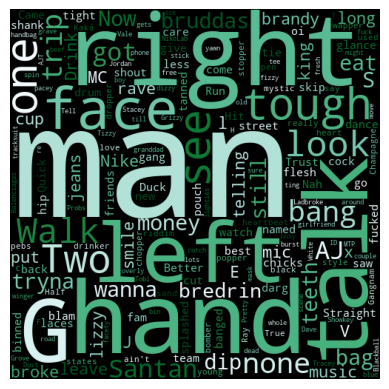

In [20]:
#Generate wordcloud showing frequency of lyrics
#https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b
wc = WordCloud(background_color='black',contour_width=4,contour_color='black',colormap='BuGn_r',width=500,height=500,collocations=False).generate(updated)
plt.axis('off')
plt.imshow(wc)